# LBP 테스트

In [1]:
import numpy as np 
from skimage.io import imread
import skimage.feature as feature 
import skimage.transform as transform
import matplotlib.pyplot as plt

In [2]:
ImageNDArray = imread("../data/telemoji/train/angry/94d0319548dd602f76ccb54cf3c37644f7faeac8d276f6703d8b9ae2.jpg", as_gray=True) 

LBP_default = feature.local_binary_pattern(ImageNDArray, 16, 2, method='default')
LBP_ror = feature.local_binary_pattern(ImageNDArray, 16, 2, method='ror')
LBP_uniform = feature.local_binary_pattern(ImageNDArray, 16, 2, method='uniform')
LBP_var = feature.local_binary_pattern(ImageNDArray, 16, 2, method='var')

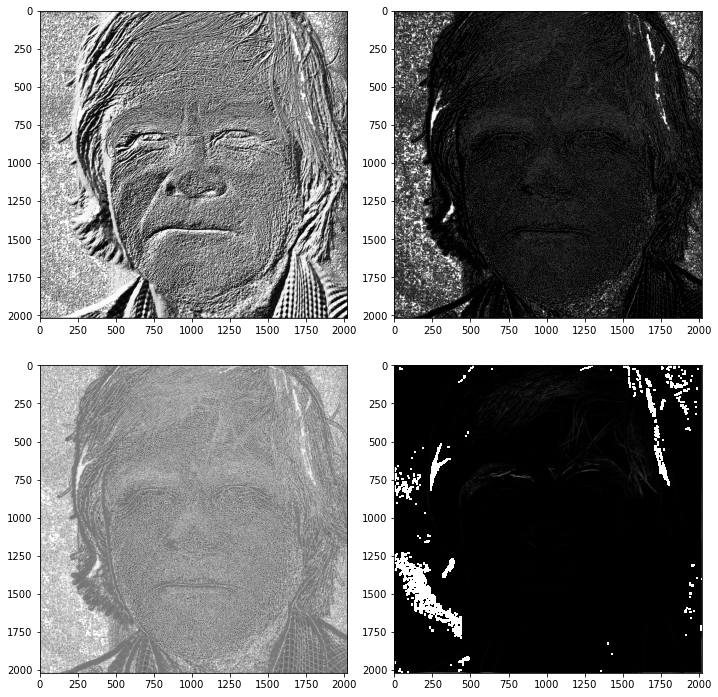

In [3]:
fig = plt.figure(figsize=(10, 10))
fig_1 = fig.add_subplot(2,2,1)
fig_2 = fig.add_subplot(2,2,2)
fig_3 = fig.add_subplot(2,2,3)
fig_4 = fig.add_subplot(2,2,4)

fig_1.imshow(LBP_default, cmap='gray')
fig_2.imshow(LBP_ror, cmap='gray')
fig_3.imshow(LBP_uniform, cmap='gray')
fig_4.imshow(LBP_var, cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
ImageNDArray = imread("../data/telemoji/train/angry/0003334751eb7b1228d3ca0d382e31f66c2043809ecb0dd4308d9e13.jpg", as_gray=True) 

LBP_16 = feature.local_binary_pattern(ImageNDArray, 16, 2, method='default')
LBP_8 = feature.local_binary_pattern(ImageNDArray, 8, 2, method='default')
LBP_4 = feature.local_binary_pattern(ImageNDArray, 4, 2, method='default')
LBP_32 = feature.local_binary_pattern(ImageNDArray, 32, 2, method='default')

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig_1 = fig.add_subplot(2,2,1)
fig_2 = fig.add_subplot(2,2,2)
fig_3 = fig.add_subplot(2,2,3)
fig_4 = fig.add_subplot(2,2,4)

fig_1.imshow(LBP_16, cmap='gray')
fig_2.imshow(LBP_8, cmap='gray')
fig_3.imshow(LBP_4, cmap='gray')
fig_4.imshow(LBP_32, cmap='gray')

plt.tight_layout()
plt.show()

# LBP를 이용한 특성 추출

In [ ]:
import os
import skimage.feature as feature 
import skimage.transform as transform
from PIL import Image
from skimage.io import imread
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [ ]:
# train 폴더 변환
path_dir = '../data/telemoji/train'
file_list = os.listdir(path_dir)

for fname in file_list:
    # train 폴더 안의 폴더 경로
    temp_dir = os.path.join(path_dir, fname)
    for iname in tqdm(os.listdir(temp_dir),total=len(os.listdir(temp_dir)),position=0,leave=True):
        img = imread(os.path.join(temp_dir, iname), as_gray=True)
        LBP = feature.local_binary_pattern(img, 16, 2, method='default')
        
        # 저장되는 파일 포맷을 jpg로 지정
        # 중간에 TIF파일이 있는데 이거 때문에 오류나서 포맷을 지정함
        plt.imsave(f"../data/telemoji/LBP/train/{fname}/{iname.split('.')[0]}.jpg", 
                   LBP, cmap="gray")

In [ ]:
# validation 폴더 변환
path_dir = '../data/telemoji/validation'
file_list = os.listdir(path_dir)

for fname in file_list:
    # train 폴더 안의 폴더 경로
    temp_dir = os.path.join(path_dir, fname)
    for iname in tqdm(os.listdir(temp_dir),total=len(os.listdir(temp_dir)),position=0,leave=True):
        img = imread(os.path.join(temp_dir, iname), as_gray=True)
        LBP = feature.local_binary_pattern(img, 16, 2, method='default')
        
        # 저장되는 파일 포맷을 jpg로 지정
        # 중간에 TIF파일이 있는데 이거 때문에 오류나서 포맷을 지정함
        plt.imsave(f"../data/telemoji/LBP/validation/{fname}/{iname.split('.')[0]}.jpg", 
                   LBP, cmap="gray")

# LBP를 이용한 학습

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications import EfficientNetB3, ResNet50

In [3]:
base_dir = '../data/telemoji/LBP'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(
      rescale=1/255,    
#     rotation_range=40,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True
)

validation_datagen = ImageDataGenerator(
    rescale=1/255
)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=100,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=100,
    class_mode='categorical'
)

Found 16800 images belonging to 7 classes.
Found 7000 images belonging to 7 classes.


In [4]:
## 다른 모델

model = Sequential()
model.add(Conv2D(64, (1, 1), padding='same', activation='relu', 
                 input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(256, (5, 5),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        128       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 128)       512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 256)       8

In [5]:
history = model.fit(train_generator, steps_per_epoch=168, epochs=30,
                    validation_data=validation_generator,
                    validation_steps=70)

Epoch 1/30
168/168 [==============================] - 231s 1s/step - loss: 2.1770 - accuracy: 0.1879 - val_loss: 2.3740 - val_accuracy: 0.1616
Epoch 2/30
168/168 [==============================] - 228s 1s/step - loss: 1.8745 - accuracy: 0.2770 - val_loss: 2.4426 - val_accuracy: 0.1430
Epoch 3/30
168/168 [==============================] - 227s 1s/step - loss: 1.6769 - accuracy: 0.3530 - val_loss: 1.9687 - val_accuracy: 0.2210
Epoch 4/30
168/168 [==============================] - 216s 1s/step - loss: 1.4657 - accuracy: 0.4473 - val_loss: 1.9199 - val_accuracy: 0.2573
Epoch 5/30
168/168 [==============================] - 227s 1s/step - loss: 1.2409 - accuracy: 0.5481 - val_loss: 1.9289 - val_accuracy: 0.2719
Epoch 6/30
168/168 [==============================] - 239s 1s/step - loss: 1.0202 - accuracy: 0.6433 - val_loss: 2.0163 - val_accuracy: 0.2896
Epoch 7/30
168/168 [==============================] - 236s 1s/step - loss: 0.7979 - accuracy: 0.7374 - val_loss: 2.0476 - val_accuracy: 0.2789